In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import keras
from keras import optimizers
from keras import backend as K
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D 
from keras.utils import plot_model
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping

from tqdm import tqdm
# from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer 
import os, re, csv, math, codecs

sns.set_style("whitegrid")
np.random.seed(0)

DATA_PATH = '../input/'
EMBEDDING_DIR = '../input/'

MAX_NB_WORDS = 100000
tokenizer = RegexpTokenizer(r'\w+')
# stop_words = set(stopwords.words('english'))
# stop_words.update(['.', ',', '"', "'", ':', ';', '(', ')', '[', ']', '{', '}'])

# from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

In [3]:
import pandas as pd

# Read the CSV file into a DataFrame
column_names = ["text", "is_hate"]

df = pd.read_csv('1.preprocessed_data.csv', on_bad_lines='skip', sep=",", encoding='iso-8859-1', header=0, names=column_names)
df['is_hate'] = df['is_hate'].astype(bool)
df['text'] = df['text'].astype('str')
df.head()

##### Data Splitting
from sklearn.model_selection import train_test_split

X = df
y = df['is_hate']  # Labels

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the split datasets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (1764, 2), y_train shape: (1764,)
X_test shape: (441, 2), y_test shape: (441,)


num train:  1764
num test:  441


/var/folders/8l/0dr6g72x2rq8wcm2j5c630j00000gn/T/ipykernel_2622/423064805.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['doc_len'], hist=True, kde=True, color='#3369e7', label='Number of Words')


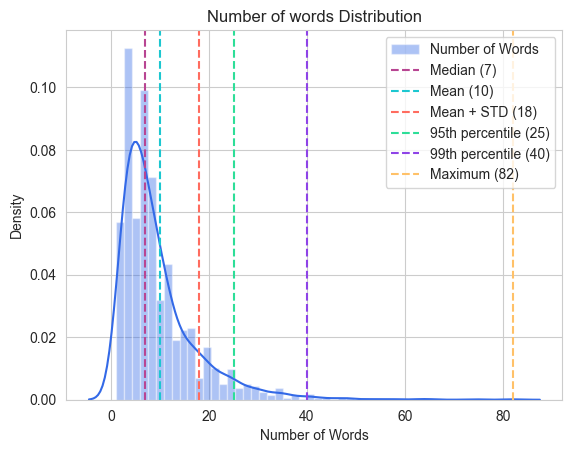

In [25]:
#load data
train_df = X_train
test_df = X_test

print("num train: ", train_df.shape[0])
print("num test: ", test_df.shape[0])

#visualize word distribution
train_df['doc_len'] = train_df['text'].apply(lambda words: len(words.split(" ")))
mean_plus_std = np.round(train_df['doc_len'].mean() + train_df['doc_len'].std()).astype(int)
longest_text = train_df['doc_len'].max()
percentile_95 = train_df['doc_len'].quantile(.95).astype(int)
percentile_99 = train_df['doc_len'].quantile(.99).astype(int)
mean = np.round(train_df['doc_len'].mean()).astype(int)
median = train_df['doc_len'].median().astype(int)
sns.distplot(train_df['doc_len'], hist=True, kde=True, color='#3369e7', label='Number of Words')
plt.axvline(x=median, color='#b84592', linestyle='--', label=f'Median ({median})')
plt.axvline(x=mean, color='#1cc7d0', linestyle='--', label=f'Mean ({mean})')
plt.axvline(x=mean_plus_std, color='#ff6c5f', linestyle='--', label=f'Mean + STD ({mean_plus_std})')
plt.axvline(x=percentile_95, color='#2dde98', linestyle='--', label=f'95th percentile ({percentile_95})')
plt.axvline(x=percentile_99, color='#8e43e7', linestyle='--', label=f'99th percentile ({percentile_99})')
plt.axvline(x=longest_text, color='#ffc168', linestyle='--', label=f'Maximum ({longest_text})')
plt.title('Number of words Distribution'); plt.legend()
plt.xlabel('Number of Words')
plt.show()